# Import danych i wstępna analiza

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weatherHistory.csv", parse_dates=True)


In [297]:
df.sample(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
43259,2010-09-14 11:00:00.000 +0200,Partly Cloudy,rain,21.638889,21.638889,0.71,5.4901,13.0,10.4167,0.0,1021.13,Foggy until morning.
96297,2016-09-30 12:00:00.000 +0200,Partly Cloudy,rain,22.850000,22.850000,0.48,9.5956,183.0,16.1000,0.0,1020.37,Partly cloudy starting in the morning continui...
66282,2013-06-29 18:00:00.000 +0200,Partly Cloudy,rain,23.794444,23.794444,0.48,11.2378,324.0,11.2700,0.0,1012.87,Partly cloudy throughout the day.
73984,2014-07-17 19:00:00.000 +0200,Mostly Cloudy,rain,20.294444,20.294444,0.77,12.5419,17.0,10.2557,0.0,1015.43,Partly cloudy throughout the day.
59305,2012-11-13 02:00:00.000 +0100,Overcast,rain,9.422222,7.800000,0.96,10.8836,321.0,9.6761,0.0,1025.66,Foggy in the morning.


In [298]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [299]:
df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [300]:
df.isnull().sum()


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [301]:
df["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [302]:
df["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Count'>

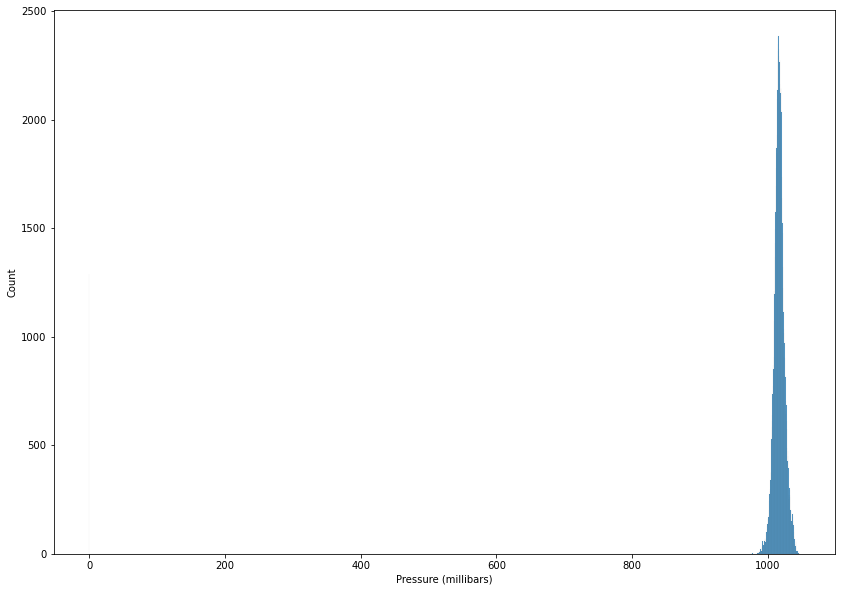

In [303]:
sns.histplot(data=df, x='Pressure (millibars)')

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

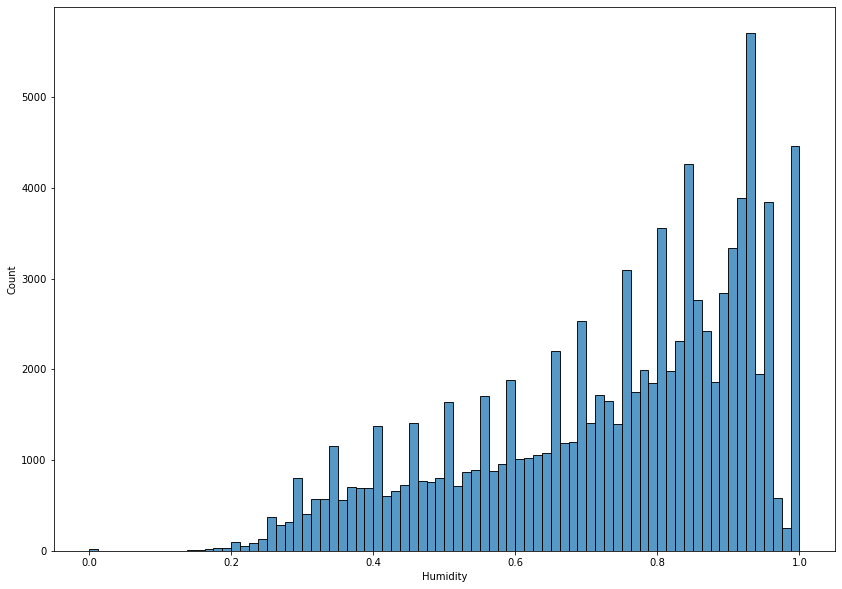

In [304]:
sns.histplot(data=df, x='Humidity')

# Sprawdzenie korelacji danych

<AxesSubplot:>

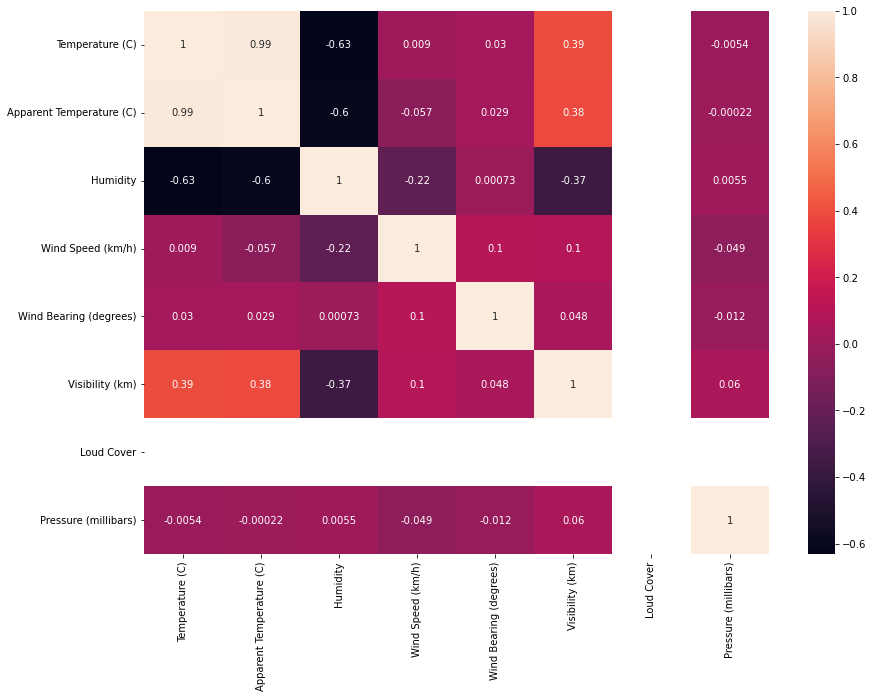

In [305]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(df.corr(), annot=True)


# Pozbycie sie danych niepotrzebnych/mocno skorelowanych między sobą oraz zamiana na dane kategoryczne

In [306]:
df['Pressure (millibars)'] = df['Pressure (millibars)'].replace(0, df['Pressure (millibars)'].median())

In [307]:
df["Precip Type"] = (
    df["Precip Type"].astype("category").cat.add_categories("lack").fillna("lack")
)

In [308]:
df.drop(columns="Apparent Temperature (C)", inplace=True)
df.drop(columns="Formatted Date", inplace=True)
df.drop(columns="Daily Summary", inplace=True)
df.drop(columns="Loud Cover", inplace=True)

# Wersja pierwsza - wzięcie 5 głównych kategorii z summary - reszta zmieniona na other

In [309]:
other = df["Summary"].value_counts()[5:].index.to_list()
other


['Breezy and Overcast',
 'Breezy and Mostly Cloudy',
 'Breezy and Partly Cloudy',
 'Dry and Partly Cloudy',
 'Windy and Partly Cloudy',
 'Light Rain',
 'Breezy',
 'Windy and Overcast',
 'Humid and Mostly Cloudy',
 'Drizzle',
 'Breezy and Foggy',
 'Windy and Mostly Cloudy',
 'Dry',
 'Humid and Partly Cloudy',
 'Dry and Mostly Cloudy',
 'Rain',
 'Windy',
 'Humid and Overcast',
 'Windy and Foggy',
 'Windy and Dry',
 'Dangerously Windy and Partly Cloudy',
 'Breezy and Dry']

In [310]:
df_other = df.replace(to_replace=other, value="other")

df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Summary                 96453 non-null  object  
 1   Precip Type             96453 non-null  category
 2   Temperature (C)         96453 non-null  float64 
 3   Humidity                96453 non-null  float64 
 4   Wind Speed (km/h)       96453 non-null  float64 
 5   Wind Bearing (degrees)  96453 non-null  float64 
 6   Visibility (km)         96453 non-null  float64 
 7   Pressure (millibars)    96453 non-null  float64 
dtypes: category(1), float64(6), object(1)
memory usage: 5.2+ MB


In [311]:
df_other["Summary"].value_counts()


Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
other             1991
Name: Summary, dtype: int64

In [312]:
df_other["Summary"] = df_other["Summary"].astype("category")
df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Summary                 96453 non-null  category
 1   Precip Type             96453 non-null  category
 2   Temperature (C)         96453 non-null  float64 
 3   Humidity                96453 non-null  float64 
 4   Wind Speed (km/h)       96453 non-null  float64 
 5   Wind Bearing (degrees)  96453 non-null  float64 
 6   Visibility (km)         96453 non-null  float64 
 7   Pressure (millibars)    96453 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 4.6 MB


In [313]:
df_other = pd.get_dummies(df_other, drop_first=True)

In [314]:
df_other

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow,Precip Type_lack
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,1,0,0,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,1,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,1,0,0,0,0,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,1,0,0,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,1,0,0,0
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,1,0,0,0
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,1,0,0,0
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,1,0,0,0


## Podzial na test i train

In [315]:
from sklearn.model_selection import train_test_split

X = df_other.drop("Visibility (km)", axis=1)
y = df_other["Visibility (km)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27
)

C:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


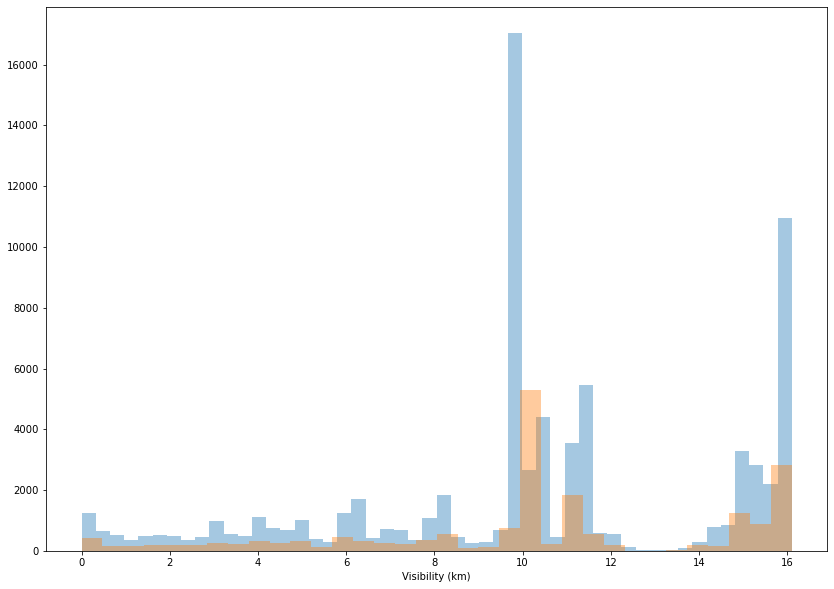

In [316]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

In [317]:
from scipy import stats 
# Kolmogorov-Smirnov test of goodness of fit
stats.kstest(y_train, y_test)

KstestResult(statistic=0.005662965388623764, pvalue=0.7031563370865719)

In [318]:
X_train.describe(include="all")

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow,Precip Type_lack
count,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000
mean,11.943316,0.734507,10.808340,187.378399,1016.820039,0.074246,0.289819,0.171224,0.330059,0.020904,0.111208,0.005391
std,9.558804,0.195484,6.920303,107.409552,7.727889,0.262173,0.453681,0.376707,0.470237,0.143064,0.314391,0.073227
min,-21.111111,0.000000,0.000000,0.000000,973.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,0.600000,5.828200,116.000000,1012.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.016667,0.780000,9.965900,180.000000,1016.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.838889,0.890000,14.119700,290.000000,1021.100000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,39.905556,1.000000,63.852600,359.000000,1046.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


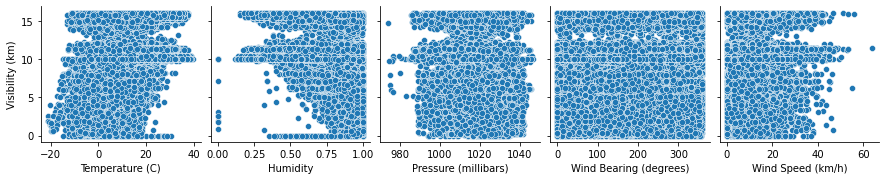

In [319]:
sns.pairplot(data=X_train.join(y_train), y_vars=['Visibility (km)'], x_vars=['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Wind Bearing (degrees)', 'Wind Speed (km/h)'])

<AxesSubplot:>

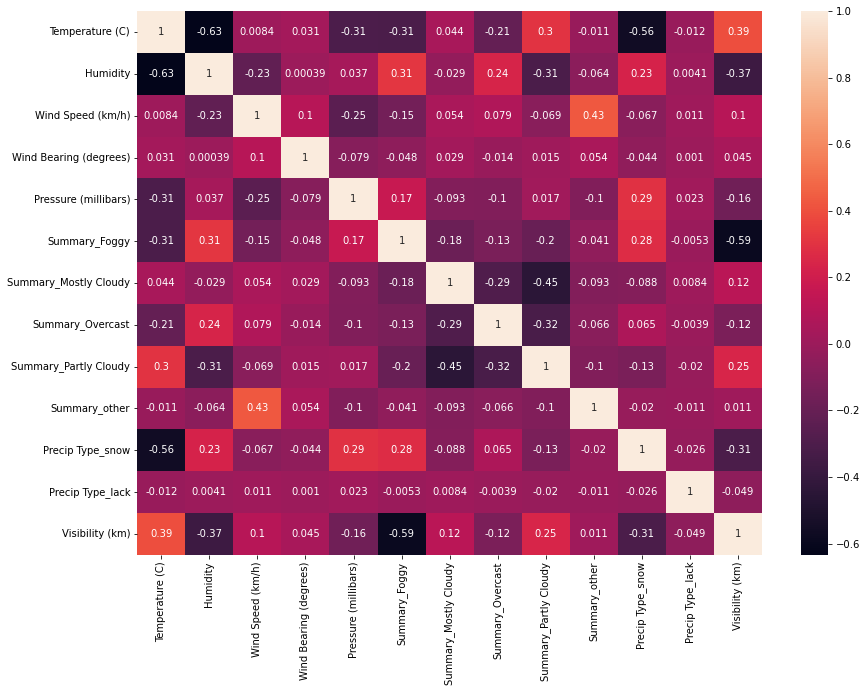

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

In [321]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#lin_reg.fit(X_train, np.log(y_train))
lin_reg.fit(X_train, y_train)


sk_theta_ls = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_ls = ["theta_" + str(i) for i in range(X_train.shape[1] + 1)]
columns_ls = ["intersect:x_0=1"] + list(X_train.columns.values)
parameter_df = pd.DataFrame({"Parameter": parameter_ls, "Columns": columns_ls})
parameter_df["Sklearn_theta"] = sk_theta_ls

parameter_df

,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,35.848186
1,theta_1,Temperature (C),0.030891
2,theta_2,Humidity,-2.055936
3,theta_3,Wind Speed (km/h),0.010388
4,theta_4,Wind Bearing (degrees),0.000396
5,theta_5,Pressure (millibars),-0.022818
6,theta_6,Summary_Foggy,-8.738295
7,theta_7,Summary_Mostly Cloudy,-0.540101
8,theta_8,Summary_Overcast,-1.936627
9,theta_9,Summary_Partly Cloudy,-0.098478


In [322]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_statsmodels = sm.add_constant(X_train)
print(OLS(y_train, X_train_statsmodels).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4971.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:44:13   Log-Likelihood:            -1.9803e+05
No. Observations:               77162   AIC:                         3.961e+05
Df Residuals:                   77149   BIC:                         3.962e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     35

In [323]:
print(OLS(np.log(y_train), X_train_statsmodels).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 29 Jun 2022   Prob (F-statistic):                nan
Time:                        20:44:13   Log-Likelihood:                    nan
No. Observations:               77162   AIC:                               nan
Df Residuals:                   77149   BIC:                               nan
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                       

C:\Users\barto\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\barto\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


# Ocena modelu

In [324]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [325]:
regression_results(y_train, y_train_pred)

explained_variance:  0.436
r2:  0.436
MAE:  2.6054
MSE:  9.9241
RMSE:  3.1502


In [326]:
regression_results(y_test, y_test_pred)

explained_variance:  0.4322
r2:  0.4322
MAE:  2.5995
MSE:  9.9247
RMSE:  3.1504


Text(0.5, 1.0, 'Visibility from data set Vs Predicted Visibility')

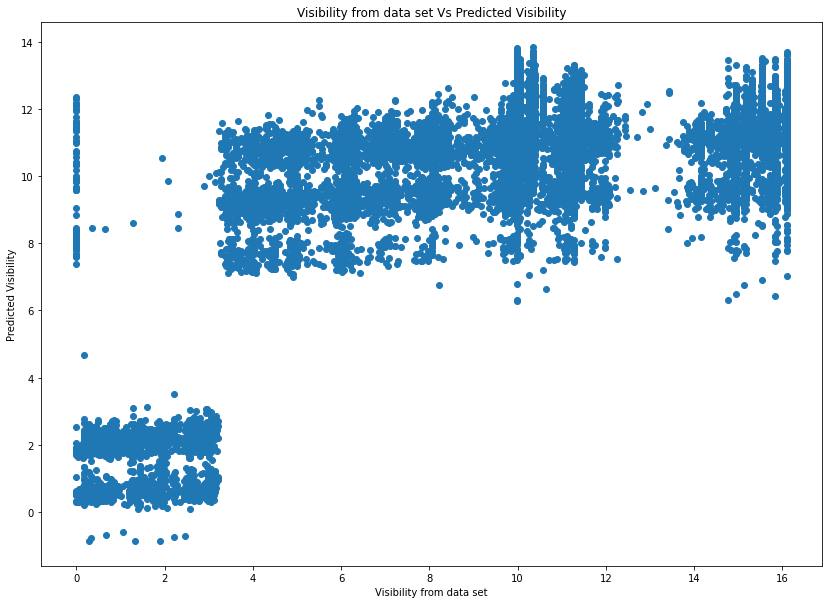

In [327]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Visibility from data set')
plt.ylabel('Predicted Visibility')
plt.title("Visibility from data set Vs Predicted Visibility")

# Regresja wielomianowa

In [328]:
import numpy as np


def polynomial_plot(feature, label):
    # Contruct first degree polynomial function
    linear_func = np.poly1d(np.polyfit(feature, label, 1))
    # Contruct second degree polynomial function
    quadratic_func = np.poly1d(np.polyfit(feature, label, 2))

    # Generate evenly spaced values
    values = np.linspace(feature.min(), feature.max(), len(feature))

    plt.scatter(feature, label, color="blue")
    plt.plot(
        values,
        linear_func(values),
        color="cyan",
        linestyle="dashed",
        label="Linear Function",
    )
    plt.plot(values, quadratic_func(values), color="red", label="Quadratic Function")
    plt.xlabel("%s From Train Data" % (feature.name))
    plt.ylabel("Visibility")
    plt.legend()
    plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    plt.show()

In [329]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

continous_features_ls = X_train.select_dtypes("float64").columns.to_list()

poly = PolynomialFeatures(degree=3)
X_cont_poly_train = poly.fit_transform(X_train[continous_features_ls])
X_cont_poly_train = pd.DataFrame(
    X_cont_poly_train, columns=poly.get_feature_names(X_train[continous_features_ls].columns)
)
X_cont_poly_train.columns

C:\Users\barto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['1', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)', 'Temperature (C)^2',
       'Temperature (C) Humidity', 'Temperature (C) Wind Speed (km/h)',
       'Temperature (C) Wind Bearing (degrees)',
       'Temperature (C) Pressure (millibars)', 'Humidity^2',
       'Humidity Wind Speed (km/h)', 'Humidity Wind Bearing (degrees)',
       'Humidity Pressure (millibars)', 'Wind Speed (km/h)^2',
       'Wind Speed (km/h) Wind Bearing (degrees)',
       'Wind Speed (km/h) Pressure (millibars)', 'Wind Bearing (degrees)^2',
       'Wind Bearing (degrees) Pressure (millibars)', 'Pressure (millibars)^2',
       'Temperature (C)^3', 'Temperature (C)^2 Humidity',
       'Temperature (C)^2 Wind Speed (km/h)',
       'Temperature (C)^2 Wind Bearing (degrees)',
       'Temperature (C)^2 Pressure (millibars)', 'Temperature (C) Humidity^2',
       'Temperature (C) Humidity Wind Speed (km/h)',
       'Temperature (C) Humidity Wind Bearing 

In [330]:
X_cont_poly_train

,1,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Temperature (C)^2,Temperature (C) Humidity,Temperature (C) Wind Speed (km/h),Temperature (C) Wind Bearing (degrees),...,Wind Speed (km/h)^3,Wind Speed (km/h)^2 Wind Bearing (degrees),Wind Speed (km/h)^2 Pressure (millibars),Wind Speed (km/h) Wind Bearing (degrees)^2,Wind Speed (km/h) Wind Bearing (degrees) Pressure (millibars),Wind Speed (km/h) Pressure (millibars)^2,Wind Bearing (degrees)^3,Wind Bearing (degrees)^2 Pressure (millibars),Wind Bearing (degrees) Pressure (millibars)^2,Pressure (millibars)^3
0,1.0,15.794444,0.78,2.2540,68.0,1017.52,249.464475,12.319667,35.600678,1074.022222,...,11.451483,345.475088,5169.526640,1.042250e+04,1.559573e+05,2.333672e+06,314432.0,4705012.48,7.040359e+07,1.053486e+09
1,1.0,7.805556,0.90,16.4542,10.0,1014.30,60.926698,7.025000,128.434172,78.055556,...,4454.821587,2707.406976,274612.289616,1.645420e+03,1.668950e+05,1.692815e+07,1000.0,101430.00,1.028804e+07,1.043516e+09
2,1.0,23.533333,0.36,16.0356,8.0,1014.98,553.817778,8.472000,377.371120,188.266667,...,4123.401678,2057.123739,260992.431561,1.026278e+03,1.302065e+05,1.651962e+07,512.0,64958.72,8.241475e+06,1.045617e+09
3,1.0,0.233333,0.84,10.8353,200.0,1019.18,0.054444,0.196000,2.528237,46.666667,...,1272.104593,23480.745218,119655.529556,4.334120e+05,2.208624e+06,1.125493e+07,8000000.0,40767200.00,2.077456e+08,1.058651e+09
4,1.0,22.155556,0.64,15.9390,69.0,1018.05,490.868642,14.179556,353.137400,1528.733333,...,4049.330381,17529.568749,258637.354564,7.588558e+04,1.119642e+06,1.651959e+07,328509.0,4846936.05,7.151338e+07,1.055133e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77157,1.0,22.894444,0.87,6.4400,190.0,1015.39,524.155586,19.918167,147.440222,4349.944444,...,267.089984,7879.984000,42111.878704,2.324840e+05,1.242431e+06,6.639749e+06,6859000.0,36655579.00,1.958932e+08,1.046884e+09
77158,1.0,19.850000,0.53,16.9211,21.0,1018.83,394.022500,10.520500,335.883835,416.850000,...,4844.910695,6012.796129,291715.099073,7.462205e+03,3.620342e+05,1.756435e+07,9261.0,449304.03,2.179831e+07,1.057560e+09
77159,1.0,7.083333,0.32,17.0821,51.0,1016.89,50.173611,2.266667,120.998208,361.250000,...,4984.525014,14881.705161,296726.611002,4.443054e+04,8.859015e+05,1.766401e+07,132651.0,2644930.89,5.273733e+07,1.051531e+09
77160,1.0,-3.983333,1.00,12.5419,309.0,1015.03,15.866944,-3.983333,-49.958568,-1230.850000,...,1972.831534,48605.469983,159663.463422,1.197513e+06,3.933695e+06,1.292174e+07,29503629.0,96916079.43,3.183583e+08,1.045771e+09


In [331]:
X_poly_train = pd.concat([X_train.select_dtypes('uint8').reset_index(drop=True),
                         X_cont_poly_train.reset_index(drop=True)], 
                        axis=1)
X_poly_train

,Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow,Precip Type_lack,1,Temperature (C),Humidity,...,Wind Speed (km/h)^3,Wind Speed (km/h)^2 Wind Bearing (degrees),Wind Speed (km/h)^2 Pressure (millibars),Wind Speed (km/h) Wind Bearing (degrees)^2,Wind Speed (km/h) Wind Bearing (degrees) Pressure (millibars),Wind Speed (km/h) Pressure (millibars)^2,Wind Bearing (degrees)^3,Wind Bearing (degrees)^2 Pressure (millibars),Wind Bearing (degrees) Pressure (millibars)^2,Pressure (millibars)^3
0,0,0,0,0,0,0,0,1.0,15.794444,0.78,...,11.451483,345.475088,5169.526640,1.042250e+04,1.559573e+05,2.333672e+06,314432.0,4705012.48,7.040359e+07,1.053486e+09
1,0,0,1,0,0,0,0,1.0,7.805556,0.90,...,4454.821587,2707.406976,274612.289616,1.645420e+03,1.668950e+05,1.692815e+07,1000.0,101430.00,1.028804e+07,1.043516e+09
2,0,0,0,1,0,0,0,1.0,23.533333,0.36,...,4123.401678,2057.123739,260992.431561,1.026278e+03,1.302065e+05,1.651962e+07,512.0,64958.72,8.241475e+06,1.045617e+09
3,0,1,0,0,0,0,0,1.0,0.233333,0.84,...,1272.104593,23480.745218,119655.529556,4.334120e+05,2.208624e+06,1.125493e+07,8000000.0,40767200.00,2.077456e+08,1.058651e+09
4,0,1,0,0,0,0,0,1.0,22.155556,0.64,...,4049.330381,17529.568749,258637.354564,7.588558e+04,1.119642e+06,1.651959e+07,328509.0,4846936.05,7.151338e+07,1.055133e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77157,0,0,0,1,0,0,0,1.0,22.894444,0.87,...,267.089984,7879.984000,42111.878704,2.324840e+05,1.242431e+06,6.639749e+06,6859000.0,36655579.00,1.958932e+08,1.046884e+09
77158,0,0,0,1,0,0,0,1.0,19.850000,0.53,...,4844.910695,6012.796129,291715.099073,7.462205e+03,3.620342e+05,1.756435e+07,9261.0,449304.03,2.179831e+07,1.057560e+09
77159,0,0,0,1,0,0,0,1.0,7.083333,0.32,...,4984.525014,14881.705161,296726.611002,4.443054e+04,8.859015e+05,1.766401e+07,132651.0,2644930.89,5.273733e+07,1.051531e+09
77160,1,0,0,0,0,1,0,1.0,-3.983333,1.00,...,1972.831534,48605.469983,159663.463422,1.197513e+06,3.933695e+06,1.292174e+07,29503629.0,96916079.43,3.183583e+08,1.045771e+09


In [332]:
X_cont_poly_test = poly.transform(X_test[continous_features_ls])
X_cont_poly_test = pd.DataFrame(
    X_cont_poly_test,
    columns=poly.get_feature_names(X_test[continous_features_ls].columns),
)
X_poly_test = pd.concat(
    [
        X_test.select_dtypes("uint8").reset_index(drop=True),
        X_cont_poly_test.reset_index(drop=True),
    ],
    axis=1,
)
X_poly_test

C:\Users\barto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow,Precip Type_lack,1,Temperature (C),Humidity,...,Wind Speed (km/h)^3,Wind Speed (km/h)^2 Wind Bearing (degrees),Wind Speed (km/h)^2 Pressure (millibars),Wind Speed (km/h) Wind Bearing (degrees)^2,Wind Speed (km/h) Wind Bearing (degrees) Pressure (millibars),Wind Speed (km/h) Pressure (millibars)^2,Wind Bearing (degrees)^3,Wind Bearing (degrees)^2 Pressure (millibars),Wind Bearing (degrees) Pressure (millibars)^2,Pressure (millibars)^3
0,1,0,0,0,0,1,0,1.0,-5.000000,0.92,...,521.660125,13608.525000,66292.957500,3.550050e+05,1.729382e+06,8.424558e+06,9261000.0,4.511430e+07,2.197711e+08,1.070599e+09
1,0,0,0,1,0,0,0,1.0,16.983333,0.60,...,43.236159,2328.233552,12636.025650,1.253736e+05,6.804402e+05,3.692954e+06,6751269.0,3.664117e+07,1.988627e+08,1.079288e+09
2,0,0,0,1,0,0,0,1.0,10.088889,0.77,...,38.648755,3349.330173,11552.902865,2.902555e+05,1.001183e+06,3.453399e+06,25153757.0,8.676329e+07,2.992741e+08,1.032291e+09
3,0,0,0,1,0,0,0,1.0,21.094444,0.82,...,1781.814779,49971.296983,149215.762534,1.401453e+06,4.184781e+06,1.249588e+07,39304000.0,1.173629e+08,3.504491e+08,1.046451e+09
4,0,0,1,0,0,0,0,1.0,8.816667,0.93,...,50.776310,0.000000,13901.848850,0.000000e+00,0.000000e+00,3.806133e+06,0.0,0.000000e+00,0.000000e+00,1.042066e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,0,1,0,0,0,0,0,1.0,3.866667,0.44,...,1920.125119,6179.400506,160174.695656,1.988672e+04,5.154787e+05,1.336159e+07,64000.0,1.658928e+06,4.300066e+07,1.114609e+09
19287,1,0,0,0,0,1,0,1.0,-1.183333,0.92,...,16211.949909,198572.237438,650195.966490,2.432214e+06,7.963932e+06,2.607674e+07,29791000.0,9.754630e+07,3.194012e+08,1.045833e+09
19288,0,0,1,0,0,0,0,1.0,8.855556,0.61,...,13916.480665,160841.362334,582558.157316,1.858943e+06,6.732984e+06,2.438648e+07,21484952.0,7.781726e+07,2.818496e+08,1.020843e+09
19289,0,0,0,0,0,1,0,1.0,-2.194444,0.95,...,238.155062,12256.427318,39459.548539,6.307656e+05,2.030749e+06,6.537992e+06,32461759.0,1.045106e+08,3.364717e+08,1.083270e+09


In [333]:
from sklearn.linear_model import LinearRegression 
#import sklearn.linear_model
lm_poly_2deg = LinearRegression() 
lm_poly_2deg.fit(X_poly_train, y_train) 

LinearRegression()

In [334]:
lm_poly_2deg.intercept_

5749.940591231701

In [335]:
lm_poly_2deg.coef_

array([-6.12852125e+00, -5.98229790e-01, -1.52281924e+00, -2.38481997e-02,
       -1.40401234e+00,  2.51244915e-01, -3.23087038e+00,  8.89178601e-01,
       -1.60121167e+02,  2.98363597e+03,  1.13289105e+02, -6.56705970e+00,
       -1.97298289e+01, -2.28918767e-01, -1.23733528e+01,  1.54274561e-01,
       -3.67057799e-04,  3.28509235e-01, -3.31641859e+02, -2.45796524e+00,
       -3.13500419e-02, -5.19175484e+00, -8.60864928e-02,  4.42693875e-03,
       -2.21162897e-01, -1.45951118e-03,  1.33692358e-02,  2.18451997e-02,
        2.88506174e-05,  3.94684710e-03, -5.97824291e-05, -3.39763661e-07,
        2.18218390e-04,  8.27590046e-01, -3.66417679e-03,  2.08590126e-04,
        1.11529863e-02, -3.73743718e-05,  2.14760466e-06, -1.51294698e-04,
        6.54490666e-07, -4.27553957e-08, -1.67709054e-04, -5.31984615e+01,
       -4.07733293e-02,  1.70448576e-02,  3.93304454e-01, -2.83022442e-04,
        1.19614642e-04,  2.39807319e-03,  3.65054842e-05, -2.94905380e-06,
        2.20148360e-03,  

In [336]:
train_pred = lm_poly_2deg.predict(X_poly_train)

In [337]:
test_pred = lm_poly_2deg.predict(X_poly_test)

In [338]:
import sklearn.metrics as metrics
import numpy as np

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

In [339]:
regression_results(y_train, train_pred)

explained_variance:  0.5192
r2:  0.5192
MAE:  2.4171
MSE:  8.461
RMSE:  2.9088


In [340]:
regression_results(y_test, test_pred)

explained_variance:  0.5086
r2:  0.5086
MAE:  2.4289
MSE:  8.5888
RMSE:  2.9307


Text(0.5, 1.0, 'Visibility from data set Vs Predicted Visibility')

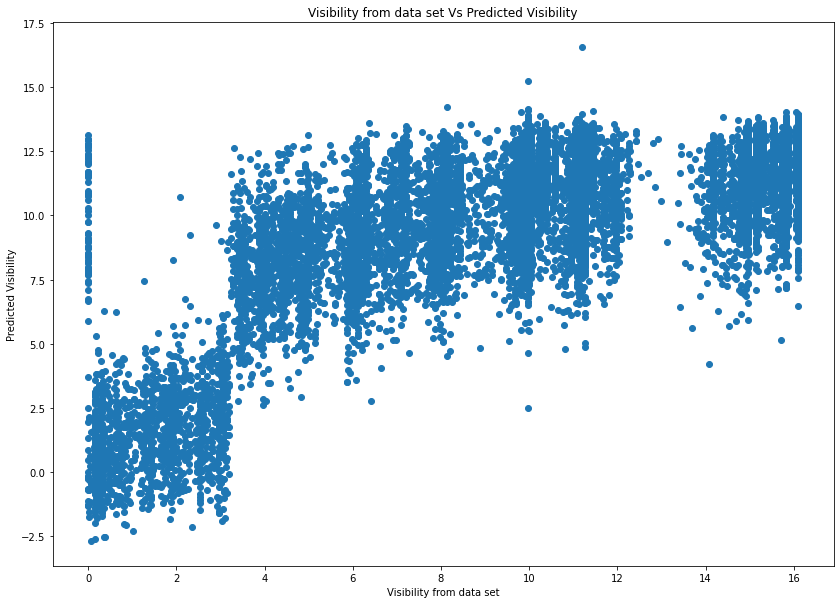

In [341]:
plt.scatter(y_test, test_pred)
plt.xlabel('Visibility from data set')
plt.ylabel('Predicted Visibility')
plt.title("Visibility from data set Vs Predicted Visibility")

C:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

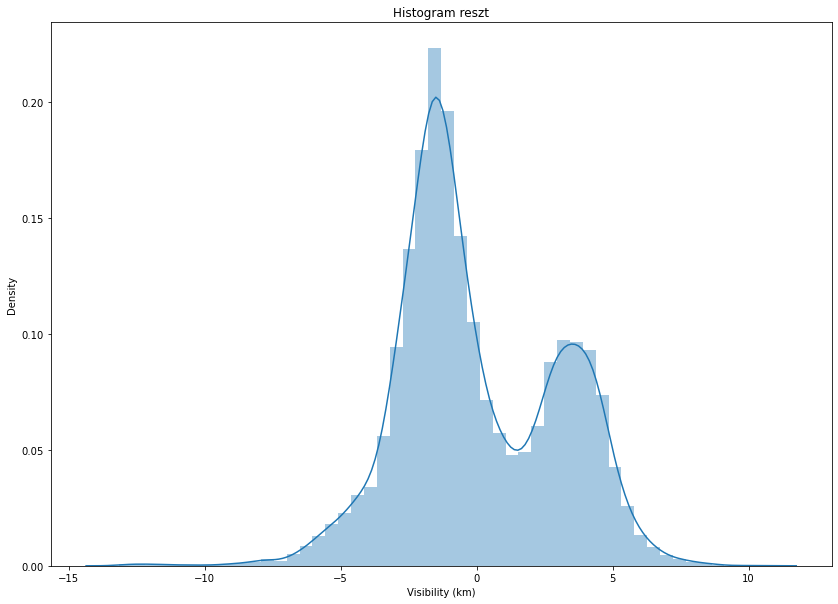

In [342]:
sns.distplot((y_test-test_pred))
plt.title("Histogram reszt")

# Summary jako 3 kategorie - good, average, bad

In [343]:
"average"
"good"
"bad"

mapping = {
    "Partly Cloudy": "average",
    "Mostly Cloudy": "bad",
    "Overcast": "average",
    "Foggy": "bad",
    "Breezy and Mostly Cloudy": "bad",
    "Clear": "good",
    "Breezy and Partly Cloudy": "average",
    "Breezy and Overcast": "average",
    "Humid and Mostly Cloudy": "bad",
    "Humid and Partly Cloudy": "average",
    "Windy and Foggy": "bad",
    "Windy and Overcast": "bad",
    "Breezy and Foggy": "bad",
    "Windy and Partly Cloudy": "average",
    "Breezy": "good",
    "Dry and Partly Cloudy": "good",
    "Windy and Mostly Cloudy": "bad",
    "Dangerously Windy and Partly Cloudy": "bad",
    "Dry": "good",
    "Windy": "average",
    "Humid and Overcast": "average",
    "Light Rain": "bad",
    "Drizzle": "bad",
    "Windy and Dry": "average",
    "Dry and Mostly Cloudy": "average",
    "Breezy and Dry": "good",
    "Rain": "bad",
}


df_gad = df
df_gad['Summary_grouped'] = df_gad.Summary.map(mapping)
df_gad

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_grouped
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,average
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,average
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,bad
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,average
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,bad
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,average
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,average
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,average
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,average


In [344]:
df_gad.drop(columns='Summary', inplace=True)

In [345]:
df_gad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Precip Type             96453 non-null  category
 1   Temperature (C)         96453 non-null  float64 
 2   Humidity                96453 non-null  float64 
 3   Wind Speed (km/h)       96453 non-null  float64 
 4   Wind Bearing (degrees)  96453 non-null  float64 
 5   Visibility (km)         96453 non-null  float64 
 6   Pressure (millibars)    96453 non-null  float64 
 7   Summary_grouped         96453 non-null  object  
dtypes: category(1), float64(6), object(1)
memory usage: 5.2+ MB


In [346]:
df_gad.Summary_grouped.astype('category')

0        average
1        average
2            bad
3        average
4            bad
          ...   
96448    average
96449    average
96450    average
96451    average
96452    average
Name: Summary_grouped, Length: 96453, dtype: category
Categories (3, object): ['average', 'bad', 'good']

In [347]:
df_gad = pd.get_dummies(df_gad, drop_first=True)
df_gad

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow,Precip Type_lack,Summary_grouped_bad,Summary_grouped_good
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0


In [348]:
from sklearn.model_selection import train_test_split

X = df_gad.drop("Visibility (km)", axis=1)
y = df_gad["Visibility (km)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27)

C:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


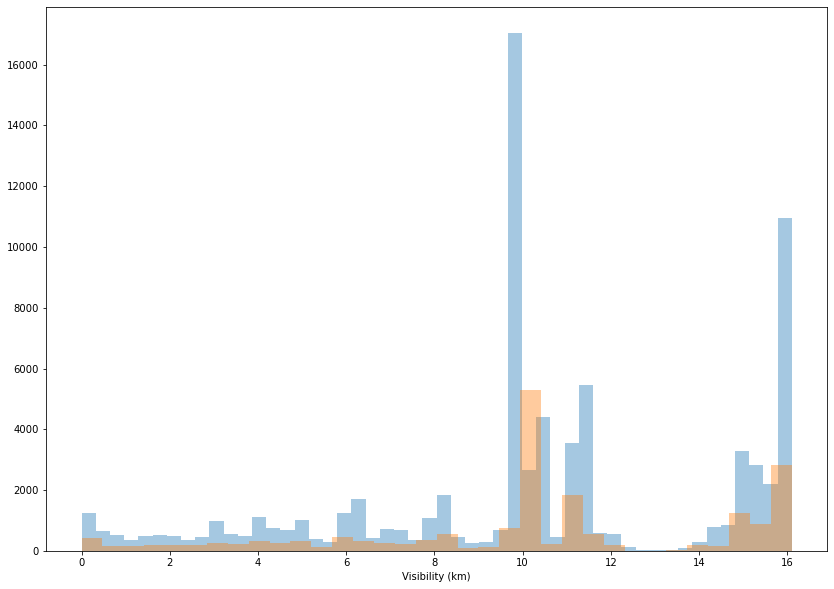

In [349]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

<AxesSubplot:>

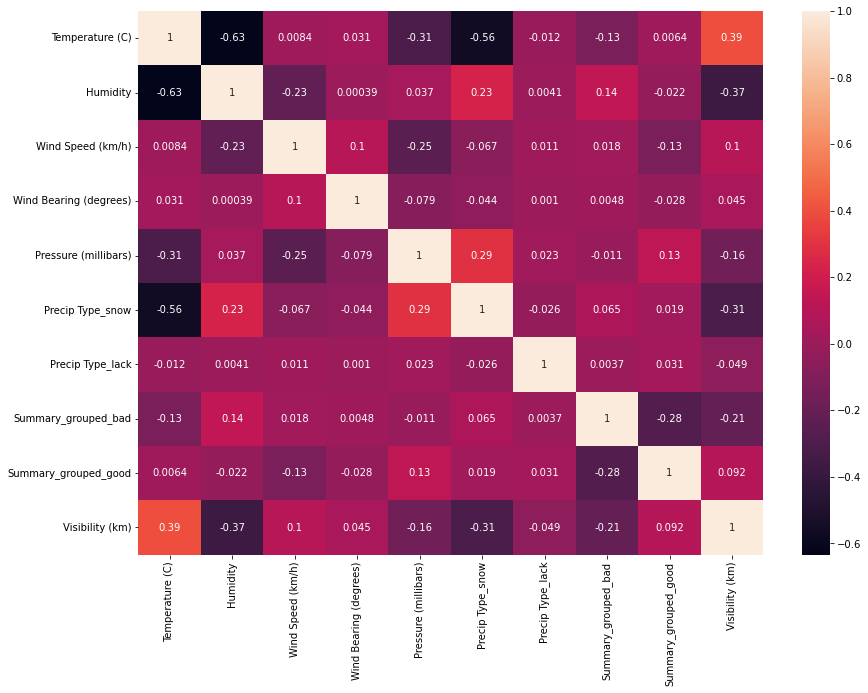

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

In [351]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#lin_reg.fit(X_train, np.log(y_train))
lin_reg.fit(X_train, y_train)


sk_theta_ls = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_ls = ["theta_" + str(i) for i in range(X_train.shape[1] + 1)]
columns_ls = ["intersect:x_0=1"] + list(X_train.columns.values)
parameter_df = pd.DataFrame({"Parameter": parameter_ls, "Columns": columns_ls})
parameter_df["Sklearn_theta"] = sk_theta_ls

parameter_df

,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,52.091881
1,theta_1,Temperature (C),0.049150
2,theta_2,Humidity,-4.956533
3,theta_3,Wind Speed (km/h),0.016612
4,theta_4,Wind Bearing (degrees),0.001131
5,theta_5,Pressure (millibars),-0.037837
6,theta_6,Precip Type_snow,-2.229150
7,theta_7,Precip Type_lack,-2.912371
8,theta_8,Summary_grouped_bad,-1.188730
9,theta_9,Summary_grouped_good,0.865499


In [352]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_statsmodels = sm.add_constant(X_train)
print(OLS(y_train, X_train_statsmodels).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2633.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:44:15   Log-Likelihood:            -2.0979e+05
No. Observations:               77162   AIC:                         4.196e+05
Df Residuals:                   77152   BIC:                         4.197e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     52

In [353]:
print(OLS(np.log(y_train), X_train_statsmodels).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 29 Jun 2022   Prob (F-statistic):                nan
Time:                        20:44:15   Log-Likelihood:                    nan
No. Observations:               77162   AIC:                               nan
Df Residuals:                   77152   BIC:                               nan
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                       

C:\Users\barto\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\barto\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


In [354]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [355]:
regression_results(y_train, y_train_pred)

explained_variance:  0.235
r2:  0.235
MAE:  3.0176
MSE:  13.4621
RMSE:  3.6691


In [356]:
regression_results(y_test, y_test_pred)

explained_variance:  0.2352
r2:  0.2352
MAE:  2.9973
MSE:  13.3683
RMSE:  3.6563


# Regresja wielomianowa - Good, average, bad

In [357]:
import numpy as np


def polynomial_plot(feature, label):
    # Contruct first degree polynomial function
    linear_func = np.poly1d(np.polyfit(feature, label, 1))
    # Contruct second degree polynomial function
    quadratic_func = np.poly1d(np.polyfit(feature, label, 2))

    # Generate evenly spaced values
    values = np.linspace(feature.min(), feature.max(), len(feature))

    plt.scatter(feature, label, color="blue")
    plt.plot(
        values,
        linear_func(values),
        color="cyan",
        linestyle="dashed",
        label="Linear Function",
    )
    plt.plot(values, quadratic_func(values), color="red", label="Quadratic Function")
    plt.xlabel("%s From Train Data" % (feature.name))
    plt.ylabel("Visibility")
    plt.legend()
    plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    plt.show()

In [358]:
X_train.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)', 'Precip Type_snow',
       'Precip Type_lack', 'Summary_grouped_bad', 'Summary_grouped_good'],
      dtype='object')

In [359]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

continous_features_ls = X_train.select_dtypes("float64").columns.to_list()

poly = PolynomialFeatures(degree=3)
X_cont_poly_train = poly.fit_transform(X_train[continous_features_ls])
X_cont_poly_train = pd.DataFrame(
    X_cont_poly_train, columns=poly.get_feature_names(X_train[continous_features_ls].columns)
)
X_cont_poly_train.columns

C:\Users\barto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['1', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)', 'Temperature (C)^2',
       'Temperature (C) Humidity', 'Temperature (C) Wind Speed (km/h)',
       'Temperature (C) Wind Bearing (degrees)',
       'Temperature (C) Pressure (millibars)', 'Humidity^2',
       'Humidity Wind Speed (km/h)', 'Humidity Wind Bearing (degrees)',
       'Humidity Pressure (millibars)', 'Wind Speed (km/h)^2',
       'Wind Speed (km/h) Wind Bearing (degrees)',
       'Wind Speed (km/h) Pressure (millibars)', 'Wind Bearing (degrees)^2',
       'Wind Bearing (degrees) Pressure (millibars)', 'Pressure (millibars)^2',
       'Temperature (C)^3', 'Temperature (C)^2 Humidity',
       'Temperature (C)^2 Wind Speed (km/h)',
       'Temperature (C)^2 Wind Bearing (degrees)',
       'Temperature (C)^2 Pressure (millibars)', 'Temperature (C) Humidity^2',
       'Temperature (C) Humidity Wind Speed (km/h)',
       'Temperature (C) Humidity Wind Bearing 

In [360]:
X_poly_train = pd.concat([X_train.select_dtypes('uint8').reset_index(drop=True),
                         X_cont_poly_train.reset_index(drop=True)], 
                        axis=1)
X_poly_train

,Precip Type_snow,Precip Type_lack,Summary_grouped_bad,Summary_grouped_good,1,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),...,Wind Speed (km/h)^3,Wind Speed (km/h)^2 Wind Bearing (degrees),Wind Speed (km/h)^2 Pressure (millibars),Wind Speed (km/h) Wind Bearing (degrees)^2,Wind Speed (km/h) Wind Bearing (degrees) Pressure (millibars),Wind Speed (km/h) Pressure (millibars)^2,Wind Bearing (degrees)^3,Wind Bearing (degrees)^2 Pressure (millibars),Wind Bearing (degrees) Pressure (millibars)^2,Pressure (millibars)^3
0,0,0,0,1,1.0,15.794444,0.78,2.2540,68.0,1017.52,...,11.451483,345.475088,5169.526640,1.042250e+04,1.559573e+05,2.333672e+06,314432.0,4705012.48,7.040359e+07,1.053486e+09
1,0,0,0,0,1.0,7.805556,0.90,16.4542,10.0,1014.30,...,4454.821587,2707.406976,274612.289616,1.645420e+03,1.668950e+05,1.692815e+07,1000.0,101430.00,1.028804e+07,1.043516e+09
2,0,0,0,0,1.0,23.533333,0.36,16.0356,8.0,1014.98,...,4123.401678,2057.123739,260992.431561,1.026278e+03,1.302065e+05,1.651962e+07,512.0,64958.72,8.241475e+06,1.045617e+09
3,0,0,1,0,1.0,0.233333,0.84,10.8353,200.0,1019.18,...,1272.104593,23480.745218,119655.529556,4.334120e+05,2.208624e+06,1.125493e+07,8000000.0,40767200.00,2.077456e+08,1.058651e+09
4,0,0,1,0,1.0,22.155556,0.64,15.9390,69.0,1018.05,...,4049.330381,17529.568749,258637.354564,7.588558e+04,1.119642e+06,1.651959e+07,328509.0,4846936.05,7.151338e+07,1.055133e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77157,0,0,0,0,1.0,22.894444,0.87,6.4400,190.0,1015.39,...,267.089984,7879.984000,42111.878704,2.324840e+05,1.242431e+06,6.639749e+06,6859000.0,36655579.00,1.958932e+08,1.046884e+09
77158,0,0,0,0,1.0,19.850000,0.53,16.9211,21.0,1018.83,...,4844.910695,6012.796129,291715.099073,7.462205e+03,3.620342e+05,1.756435e+07,9261.0,449304.03,2.179831e+07,1.057560e+09
77159,0,0,0,0,1.0,7.083333,0.32,17.0821,51.0,1016.89,...,4984.525014,14881.705161,296726.611002,4.443054e+04,8.859015e+05,1.766401e+07,132651.0,2644930.89,5.273733e+07,1.051531e+09
77160,1,0,1,0,1.0,-3.983333,1.00,12.5419,309.0,1015.03,...,1972.831534,48605.469983,159663.463422,1.197513e+06,3.933695e+06,1.292174e+07,29503629.0,96916079.43,3.183583e+08,1.045771e+09


In [361]:
X_cont_poly_test = poly.transform(X_test[continous_features_ls])
X_cont_poly_test = pd.DataFrame(
    X_cont_poly_test,
    columns=poly.get_feature_names(X_test[continous_features_ls].columns),
)
X_poly_test = pd.concat(
    [
        X_test.select_dtypes("uint8").reset_index(drop=True),
        X_cont_poly_test.reset_index(drop=True),
    ],
    axis=1,
)
X_poly_test

C:\Users\barto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Precip Type_snow,Precip Type_lack,Summary_grouped_bad,Summary_grouped_good,1,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),...,Wind Speed (km/h)^3,Wind Speed (km/h)^2 Wind Bearing (degrees),Wind Speed (km/h)^2 Pressure (millibars),Wind Speed (km/h) Wind Bearing (degrees)^2,Wind Speed (km/h) Wind Bearing (degrees) Pressure (millibars),Wind Speed (km/h) Pressure (millibars)^2,Wind Bearing (degrees)^3,Wind Bearing (degrees)^2 Pressure (millibars),Wind Bearing (degrees) Pressure (millibars)^2,Pressure (millibars)^3
0,1,0,1,0,1.0,-5.000000,0.92,8.0500,210.0,1023.00,...,521.660125,13608.525000,66292.957500,3.550050e+05,1.729382e+06,8.424558e+06,9261000.0,4.511430e+07,2.197711e+08,1.070599e+09
1,0,0,0,0,1.0,16.983333,0.60,3.5098,189.0,1025.76,...,43.236159,2328.233552,12636.025650,1.253736e+05,6.804402e+05,3.692954e+06,6751269.0,3.664117e+07,1.988627e+08,1.079288e+09
2,0,0,0,0,1.0,10.088889,0.77,3.3810,293.0,1010.65,...,38.648755,3349.330173,11552.902865,2.902555e+05,1.001183e+06,3.453399e+06,25153757.0,8.676329e+07,2.992741e+08,1.032291e+09
3,0,0,0,0,1.0,21.094444,0.82,12.1233,340.0,1015.25,...,1781.814779,49971.296983,149215.762534,1.401453e+06,4.184781e+06,1.249588e+07,39304000.0,1.173629e+08,3.504491e+08,1.046451e+09
4,0,0,0,0,1.0,8.816667,0.93,3.7030,0.0,1013.83,...,50.776310,0.000000,13901.848850,0.000000e+00,0.000000e+00,3.806133e+06,0.0,0.000000e+00,0.000000e+00,1.042066e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,0,0,1,0,1.0,3.866667,0.44,12.4292,40.0,1036.83,...,1920.125119,6179.400506,160174.695656,1.988672e+04,5.154787e+05,1.336159e+07,64000.0,1.658928e+06,4.300066e+07,1.114609e+09
19287,1,0,1,0,1.0,-1.183333,0.92,25.3092,310.0,1015.05,...,16211.949909,198572.237438,650195.966490,2.432214e+06,7.963932e+06,2.607674e+07,29791000.0,9.754630e+07,3.194012e+08,1.045833e+09
19288,0,0,0,0,1.0,8.855556,0.61,24.0534,278.0,1006.90,...,13916.480665,160841.362334,582558.157316,1.858943e+06,6.732984e+06,2.438648e+07,21484952.0,7.781726e+07,2.818496e+08,1.020843e+09
19289,1,0,0,1,1.0,-2.194444,0.95,6.1985,319.0,1027.02,...,238.155062,12256.427318,39459.548539,6.307656e+05,2.030749e+06,6.537992e+06,32461759.0,1.045106e+08,3.364717e+08,1.083270e+09


In [362]:
from sklearn.linear_model import LinearRegression 
#import sklearn.linear_model
lm_poly_2deg = LinearRegression() 
lm_poly_2deg.fit(X_poly_train, y_train) 

LinearRegression()

In [363]:
lm_poly_2deg.intercept_

37505.54654881185

In [364]:
lm_poly_2deg.coef_

array([ 2.56360587e-01, -3.36589964e+00, -8.67447304e-01,  4.87481070e-01,
       -1.44873290e-04, -1.83051578e+02, -2.71465143e+03,  7.78432864e+01,
       -7.57538680e+00, -1.09507465e+02, -1.83516361e-01, -8.01065338e+00,
        1.60498786e-01, -1.74124625e-03,  3.70302149e-01,  1.79077223e+02,
        3.08392573e+00, -7.88920432e-02,  5.30331970e+00, -7.41682209e-02,
        1.04756419e-02, -1.56261838e-01, -2.45604564e-03,  1.56916146e-02,
        1.06508554e-01,  4.79167484e-05,  4.62016202e-03, -7.59237787e-05,
       -7.61670151e-07,  1.72310476e-04,  1.19785864e+00, -9.82739491e-03,
        8.39286696e-05,  6.56972704e-03,  3.09572664e-05, -1.43009525e-06,
       -1.54957374e-04,  1.44699067e-06,  1.14636759e-06, -1.86554862e-04,
       -7.68016695e+01, -1.16047305e-01,  1.60382604e-02, -7.62710444e-02,
        6.55807568e-04, -1.01740326e-04, -2.88232808e-03,  4.22624521e-05,
        4.84868130e-05, -2.62382772e-03,  5.28379529e-05, -6.68239835e-06,
        6.95865877e-05, -

In [365]:
train_pred = lm_poly_2deg.predict(X_poly_train)

In [366]:
test_pred = lm_poly_2deg.predict(X_poly_test)

In [367]:
import sklearn.metrics as metrics
import numpy as np

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

In [368]:
regression_results(y_train, train_pred)

explained_variance:  0.4469
r2:  0.4469
MAE:  2.567
MSE:  9.7335
RMSE:  3.1199


In [369]:
regression_results(y_test, test_pred)

explained_variance:  0.4344
r2:  0.4344
MAE:  2.5799
MSE:  9.887
RMSE:  3.1444


Text(0.5, 1.0, 'Visibility from data set Vs Predicted Visibility')

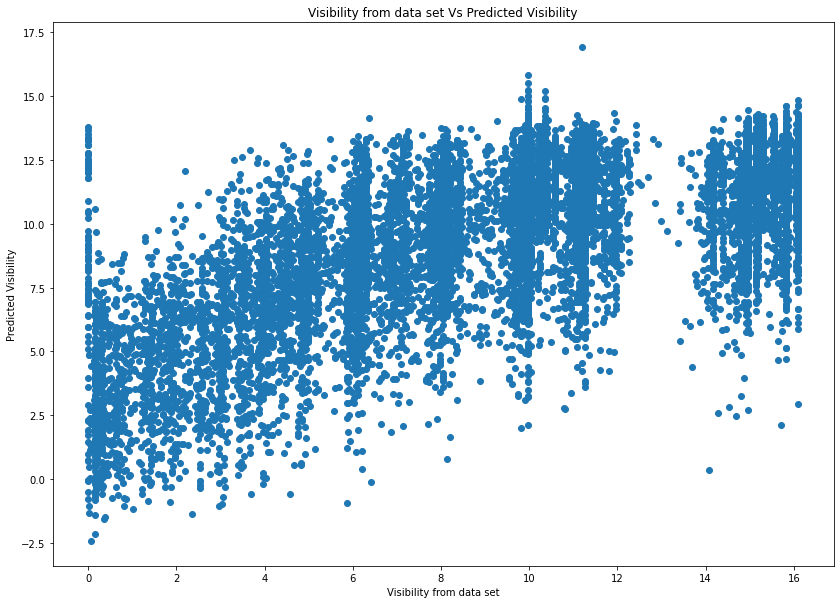

In [370]:
plt.scatter(y_test, test_pred)
plt.xlabel('Visibility from data set')
plt.ylabel('Predicted Visibility')
plt.title("Visibility from data set Vs Predicted Visibility")

C:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

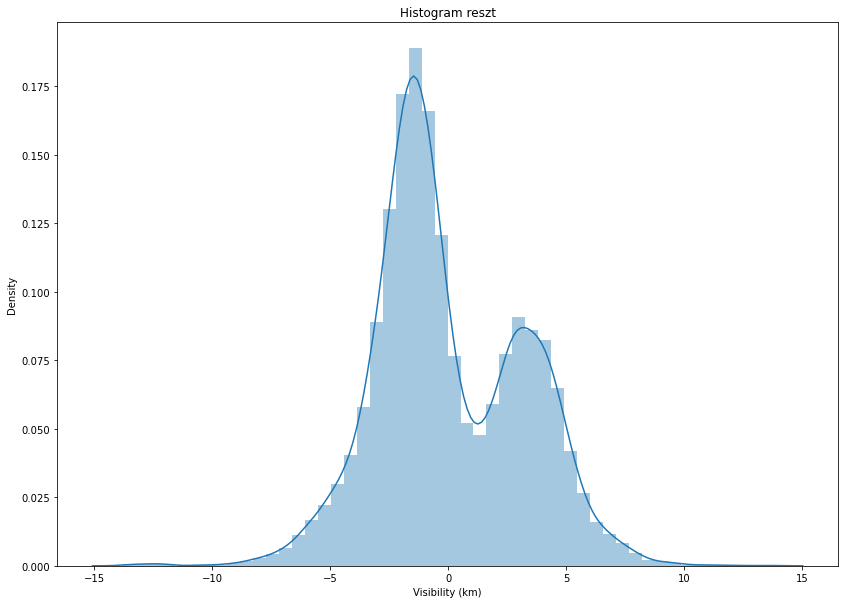

In [371]:
sns.distplot((y_test-test_pred))
plt.title("Histogram reszt")